In [61]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn import svm, tree

In [62]:
df = pd.read_csv('./newdata.csv')
df

,File,sobelv_rat,sobelh_rat,lappos_rat,lapneg_rat,sobelv_gavg,sobelh_gavg,lappos_gavg,lapneg_gavg
0,030FD_070075.jpg,3.294904,2.616644,1.000000,2.162001,0.663535,0.643955,248.814349,2.285475
1,046TE_056100.jpg,2.761612,2.904580,1.001333,1.747453,1.031123,0.596895,245.124902,1.241924
2,030FD_067125.jpg,2.589823,2.472751,1.000047,1.940613,1.084945,0.807962,225.971680,2.185658
3,030FD_013375.jpg,4.967019,5.436649,1.591819,2.927421,0.157926,0.154167,148.306556,1.003548
4,030FD_012225.jpg,11.307782,7.885557,1.304853,3.732939,0.050068,0.105742,141.667546,0.834316
...,...,...,...,...,...,...,...,...,...
913,030FD_068725.jpg,2.621225,2.746352,1.013071,4.047458,2.100091,2.087337,236.058470,4.012546
914,030FD_018075.jpg,2.817199,2.703324,1.000002,2.116785,1.228538,1.131738,239.423174,3.024085
915,030FD_023275.jpg,3.942041,3.300693,1.000317,2.108124,1.237816,1.461566,216.519818,3.375557
916,030FD_014925.jpg,2.367422,2.277146,1.053845,1.691496,1.079561,1.254600,227.545651,2.569180


In [63]:
df = pd.read_csv('./Img_Features_Norm (1).csv')


df

,Unnamed: 0,Variance,EM Variance,Local Variance,EM Local Variance,Entropy,Crofton Perimeter,Standard Deviation,Partial Derivative Sum,Number of Corners,Average Corner Strength,Sobel V Color Avg,Sobel V Gray Avg,Sobel H Color Avg,Sobel H Gray Avg,Laplacian Positive Color Avg,Laplacian Positive Gray Avg,Laplacian Negative Color Avg,Laplacian Negative Gray Avg,Class
0,046TE_039500.jpg,0.818257,0.693422,0.673303,0.523358,0.786564,0.420360,0.904576,0.384424,0.197567,0.150730,0.252045,0.534849,0.671998,0.574316,0.871268,0.643220,0.901998,0.900533,1
1,030FD_069750.jpg,0.229388,0.413471,0.187847,0.207935,0.938648,0.112804,0.478944,0.261055,0.380254,0.210888,0.245834,0.645475,0.536076,0.641298,0.778897,0.651590,0.824483,0.790577,1
2,030FD_036825.jpg,0.386879,0.581701,0.151492,0.193129,0.980419,0.112804,0.621996,0.155249,0.066847,0.014989,0.334500,0.605327,0.614408,0.588053,0.677562,0.590347,0.754956,0.530097,1
3,030FD_013375.jpg,0.060758,0.049653,0.228389,0.125328,0.669828,0.112804,0.246492,0.031395,0.035355,0.011874,0.065456,0.057880,0.050329,0.100499,0.177277,0.613944,0.147380,0.572948,1
4,038RB_064725.jpg,0.558283,0.652509,0.414603,0.316632,0.982594,0.160489,0.747184,0.290692,0.180469,0.061351,0.035937,0.000000,0.035556,0.119365,0.124795,0.600264,0.075910,0.388774,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,046TE_056325.jpg,0.290105,0.496220,0.248461,0.221823,0.974657,0.112804,0.538614,0.246196,0.255237,0.122570,0.853627,0.851553,0.713991,0.905388,0.739700,0.697465,0.838169,0.935378,0
914,030FD_001550.jpg,0.428962,0.544562,0.320354,0.340732,0.984094,0.146921,0.654952,0.566390,0.876397,0.768186,0.478119,0.530198,0.519040,0.679312,0.708958,0.647322,0.869959,0.805533,0
915,046TE_054625.jpg,0.415389,0.614099,0.180131,0.284630,0.975032,0.112804,0.644507,0.378318,0.230863,0.110709,0.617991,0.773103,0.467351,0.878211,0.628926,0.420819,0.714130,0.948228,0
916,030FD_021825.jpg,0.541687,0.628841,0.262145,0.137627,0.932894,0.340673,0.735994,0.478992,0.430831,0.239809,0.515514,0.581625,0.357319,0.840614,0.598822,0.613229,0.736507,0.668388,0


In [64]:
df = pd.read_csv('./04.24.22 Features Plus New Variables.csv')
df

,File,lapneg_gavg,lappos_gavg,sobelh_gavg,sobelv_gavg,lapneg_rat,lappos_rat,sobelh_rat,sobelv_rat,Variance,...,Laplacian Negative Color Avg,Laplacian Negative Gray Avg,sobelv_gmax10,sobelv_gmax50,sobelh_gmax10,sobelh_gmax50,lapneg_gmax10,lapneg_gmax50,Class,Reclass
0,030FD_070075.jpg,2.285475,248.814349,0.643955,0.663535,2.162001,1.000000,2.616644,3.294904,0.179262,...,79.022530,110.771491,3.453451,1.048119,3.592773,1.373046,6.447917,2.982383,1,0
1,046TE_056100.jpg,1.241924,245.124902,0.596895,1.031123,1.747453,1.001333,2.904580,2.761612,0.244305,...,74.495421,104.005858,4.875000,1.765273,2.990885,1.029714,2.729167,1.561797,1,1
2,030FD_067125.jpg,2.185658,225.971680,0.807962,1.084945,1.940613,1.000047,2.472751,2.589823,0.492954,...,70.434783,87.978332,5.724284,2.210299,4.463542,1.805091,7.357096,3.791120,1,1
3,030FD_013375.jpg,1.003548,148.306556,0.154167,0.157926,2.927421,1.591819,5.436649,4.967019,0.060758,...,34.950225,90.614992,2.353190,0.473763,2.473958,0.455052,4.621094,1.578555,1,1
4,030FD_012225.jpg,0.834316,141.667546,0.105742,0.050068,3.732939,1.304853,7.885557,11.307782,0.007880,...,30.776138,79.282629,1.258138,0.111263,2.222331,0.281823,4.308919,1.154297,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,030FD_068725.jpg,4.012546,236.058470,2.087337,2.100091,4.047458,1.013071,2.746352,2.621225,0.538473,...,75.294703,112.915557,8.254808,3.149217,7.829427,2.850846,20.104167,4.967109,0,0
914,030FD_018075.jpg,3.024085,239.423174,1.131738,1.228538,2.116785,1.000002,2.703324,2.817199,0.480100,...,77.151393,104.926066,7.357955,2.611798,6.450758,2.386232,8.937500,4.222205,0,0
915,030FD_023275.jpg,3.375557,216.519818,1.461566,1.237816,2.108124,1.000317,3.300693,3.942041,0.389871,...,68.050403,113.706195,6.710938,1.702402,6.206055,1.880228,9.270833,4.397671,0,0
916,030FD_014925.jpg,2.569180,227.545651,1.254600,1.079561,1.691496,1.053845,2.277146,2.367422,0.360616,...,69.357303,96.487428,5.188477,2.191615,6.454861,2.834627,8.089193,4.782272,0,0


In [65]:
df.columns

Index(['File', 'lapneg_gavg', 'lappos_gavg', 'sobelh_gavg', 'sobelv_gavg',
       'lapneg_rat', 'lappos_rat', 'sobelh_rat', 'sobelv_rat', 'Variance',
       'EM Variance', 'Local Variance', 'EM Local Variance', 'Entropy',
       'Crofton Perimeter', 'Standard Deviation', 'Partial Derivative Sum',
       'Number of Corners', 'Average Corner Strength', 'Sobel V Color Avg',
       'Sobel V Gray Avg', 'Sobel H Color Avg', 'Sobel H Gray Avg',
       'Laplacian Positive Color Avg', 'Laplacian Positive Gray Avg',
       'Laplacian Negative Color Avg', 'Laplacian Negative Gray Avg',
       'sobelv_gmax10', 'sobelv_gmax50', 'sobelh_gmax10', 'sobelh_gmax50',
       'lapneg_gmax10', 'lapneg_gmax50', 'Class', 'Reclass'],
      dtype='object')

In [89]:
feature_space = [
#     'File', 
#     'lapneg_gavg', 
#     'lappos_gavg', 
    'sobelh_gavg', 
    'sobelv_gavg',
#     'lapneg_rat', 
#     'lappos_rat', 
#     'sobelh_rat', 
#     'sobelv_rat', 
#     'Variance',
#     'EM Variance', 
#     'Local Variance', 
#     'EM Local Variance', 
#     'Entropy',
#     'Crofton Perimeter', 
#     'Standard Deviation', 
    'Partial Derivative Sum',
    'Number of Corners', 
    'Average Corner Strength', 
    'Sobel V Color Avg',
    'Sobel V Gray Avg', 
#     'Sobel H Color Avg', 
#     'Sobel H Gray Avg',
#     'Laplacian Positive Color Avg', 
#     'Laplacian Positive Gray Avg',
#     'Laplacian Negative Color Avg', 
#     'Laplacian Negative Gray Avg',
#     'sobelv_gmax10', 
#     'sobelv_gmax50', 
#     'sobelh_gmax10', 
#     'sobelh_gmax50',
#     'lapneg_gmax10', 
#     'lapneg_gmax50', 
#     'Class', 
#     'Reclass'
]
df[feature_space]

,sobelh_gavg,sobelv_gavg,Partial Derivative Sum,Number of Corners,Average Corner Strength,Sobel V Color Avg,Sobel V Gray Avg
0,0.643955,0.663535,0.211960,1921.030582,0.106196,0.660179,51.620220
1,0.596895,1.031123,0.154638,1069.304157,0.033369,0.645074,60.566267
2,0.807962,1.084945,0.403457,2592.727554,0.100886,0.860723,57.319629
3,0.154167,0.157926,0.031395,366.759442,0.011874,0.206364,13.048981
4,0.105742,0.050068,0.014139,115.173337,0.004469,0.134569,8.368360
...,...,...,...,...,...,...,...
913,2.087337,2.100091,0.719885,8937.627971,0.660273,2.123325,77.231293
914,1.131738,1.228538,0.483961,5010.609087,0.322652,1.210027,51.244089
915,1.461566,1.237816,0.375076,4928.559146,0.271827,1.550219,70.887232
916,1.254600,1.079561,0.412157,4323.488243,0.253837,1.300979,55.402882


In [90]:
str(feature_space)

"['sobelh_gavg', 'sobelv_gavg', 'Partial Derivative Sum', 'Number of Corners', 'Average Corner Strength', 'Sobel V Color Avg', 'Sobel V Gray Avg']"

In [91]:
data = np.array(df)
X_filename = data[:, 0]
X = np.array(df[feature_space]).astype(float)
y = np.array(df["Reclass"]).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [92]:
X_train.shape

(459, 7)

In [93]:
X_test.shape

(459, 7)

In [94]:
sv_clfs = [
    sklearn.tree.DecisionTreeClassifier(),
    svm.SVC(kernel="linear"),
    svm.SVC(kernel="poly"),
    svm.SVC(kernel="rbf")
]
sv_stats = []

for sv_clf in sv_clfs:
    sv_clf.fit(X_train, y_train)
    sv_cm = confusion_matrix(y_test, sv_clf.predict(X_test))
    sv_cm_rates = (sv_cm / np.sum(sv_cm, axis=0)).round(2)
    
#     print("\n\n#", str(sv_clf))
#     print("confusion matrix\n", sv_cm)
#     print("confusion matrix percentages\n", sv_cm_rates)
    
    sv_stats.append([
        str(sv_clf), 
        sv_clf.score(X_train, y_train),
        sv_clf.score(X_test, y_test),
        sv_cm[0, 0], 
        sv_cm[0, 1], 
        sv_cm[1, 0], 
        sv_cm[1, 1],
        sv_cm_rates[0, 0], 
        sv_cm_rates[0, 1], 
        sv_cm_rates[1, 0], 
        sv_cm_rates[1, 1],
    ])
    
sv_stats = np.array(sv_stats)

<ipython-input-94-0a75ad8d2eaa>:12: RuntimeWarning: invalid value encountered in true_divide
  sv_cm_rates = (sv_cm / np.sum(sv_cm, axis=0)).round(2)


In [95]:
sv_stats

array([['DecisionTreeClassifier()', '1.0', '0.8562091503267973', '356',
        '29', '37', '37', '0.91', '0.44', '0.09', '0.56'],
       ["SVC(kernel='linear')", '0.869281045751634',
        '0.8714596949891068', '377', '8', '51', '23', '0.88', '0.26',
        '0.12', '0.74'],
       ["SVC(kernel='poly')", '0.8496732026143791', '0.8387799564270153',
        '385', '0', '74', '0', '0.84', 'nan', '0.16', 'nan'],
       ['SVC()', '0.8583877995642701', '0.8540305010893247', '385', '0',
        '67', '7', '0.85', '0.0', '0.15', '1.0']], dtype='<U24')

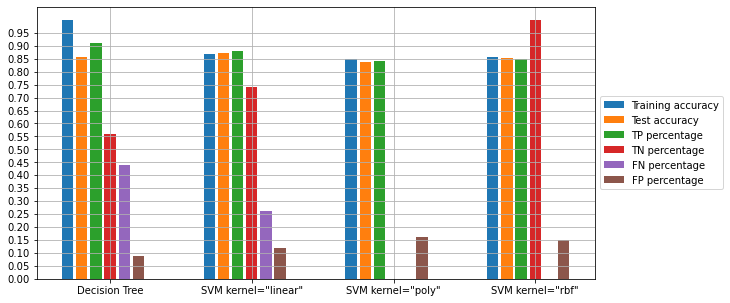

In [96]:
plt.figure(figsize=(10, 5))

bar_x = np.array([1, 2, 3, 4]) * 10
bar_width = 1;

plt.bar(bar_x, sv_stats[:, 1].astype(float), label="Training accuracy")

bar_x += 1
plt.bar(bar_x, sv_stats[:, 2].astype(float), label="Test accuracy")

bar_x += 1
plt.bar(bar_x, sv_stats[:, 7].astype(float), label="TP percentage")

bar_x += 1
plt.bar(bar_x, sv_stats[:, 10].astype(float), label="TN percentage")

bar_x += 1
plt.bar(bar_x, sv_stats[:, 8].astype(float), label="FN percentage")

bar_x += 1
plt.bar(bar_x, sv_stats[:, 9].astype(float), label="FP percentage")

bar_x -= 2
plt.yticks(np.array(range(20)) * 0.05)
plt.xticks(bar_x, ["Decision Tree", 'SVM kernel="linear"', 'SVM kernel="poly"', 'SVM kernel="rbf"'])
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

[Text(152.70797872340424, 207.55636363636364, 'X[4] <= 0.062\ngini = 0.255\nsamples = 459\nvalue = [390, 69]'),
 Text(47.19255319148936, 187.7890909090909, 'X[4] <= 0.023\ngini = 0.482\nsamples = 74\nvalue = [30, 44]'),
 Text(21.370212765957447, 168.0218181818182, 'X[5] <= 0.31\ngini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(14.246808510638298, 148.25454545454545, 'X[6] <= 26.238\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(7.123404255319149, 128.48727272727274, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(21.370212765957447, 128.48727272727274, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(28.493617021276595, 148.25454545454545, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(73.01489361702127, 168.0218181818182, 'X[3] <= 1282.015\ngini = 0.498\nsamples = 51\nvalue = [27, 24]'),
 Text(53.42553191489362, 148.25454545454545, 'X[4] <= 0.044\ngini = 0.469\nsamples = 40\nvalue = [25, 15]'),
 Text(35.61702127659574, 128.48727272727274, 'X[3] <= 774.417\ngini = 0.5\

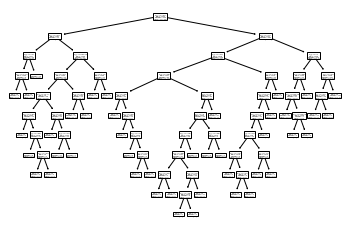

In [97]:
tree.plot_tree(sv_clfs[0])